Importing important python libraries and Loading the data

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
from dateutil.parser import parse


series = pd.read_csv("/Users/gulnihal/Desktop/births2015/Births2015.csv", header=0, index_col=0)



# Feature Engineering

In this part, I extracted some features from data and value to make more insightful conclusions about the data

Date/Time based features are already given. So no need to extract a number of features from the date column.

## Lag Features


 The lag value we choose will depend on the correlation of individual values with its past values.

 If the series has a weekly trend, which means the value last Monday can be used to predict the value for this Monday, lag features for seven days should be created. 


In [28]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv("/Users/gulnihal/Desktop/births2015/Births2015.csv", header=0, index_col=0)
series["Lag1"] = series["births"].shift(1)
series["Lag7"] = series["births"].shift(7)
series["Lag8"] = series["births"].shift(8)

series[["births", "Lag1", "Lag7", "Lag8"]].head(15)


,births,Lag1,Lag7,Lag8
1,8068,NaN,NaN,NaN
2,10850,8068.0,NaN,NaN
3,8328,10850.0,NaN,NaN
4,7065,8328.0,NaN,NaN
5,11892,7065.0,NaN,NaN
6,12425,11892.0,NaN,NaN
7,12141,12425.0,NaN,NaN
8,12094,12141.0,8068.0,NaN
9,11868,12094.0,10850.0,8068.0
10,8014,11868.0,8328.0,10850.0


    As we found earlier Lag7 is pretty close to actual values

## Autocorrelation (ACF/PACF)

a measure of the correlation between the time series and the lagged version of itself and a measure of the correlation between the time series with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons respectively.


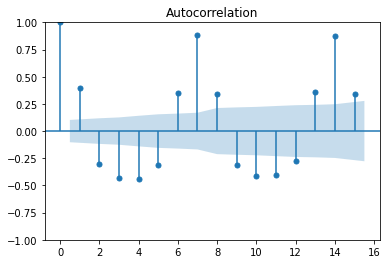

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


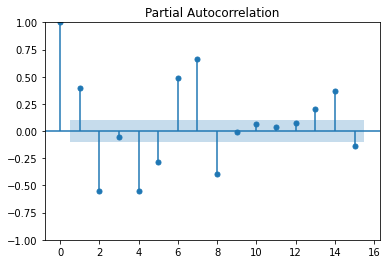

In [36]:
from statsmodels.graphics.tsaplots import plot_acf
from pandas import read_csv
from matplotlib import pyplot
plot_acf(data["births"], lags=15)
pyplot.show()

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["births"], lags=15)
pyplot.show()





    As we found earlier multipliers of 7 are pretty close to actual values

In [37]:

births = DataFrame(series.births)
dataframe = concat([births.shift(1), births], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))


       t-1    t+1
1      NaN   8068
2   8068.0  10850
3  10850.0   8328
4   8328.0   7065
5   7065.0  11892


sliding window

In [38]:

dataframe = concat([births.shift(3), births.shift(2), births.shift(1), births], axis=1)
dataframe.columns = ['t-3', 't-2', 't-1', 't+1']
print(dataframe.head(5))


       t-3      t-2      t-1    t+1
1      NaN      NaN      NaN   8068
2      NaN      NaN   8068.0  10850
3      NaN   8068.0  10850.0   8328
4   8068.0  10850.0   8328.0   7065
5  10850.0   8328.0   7065.0  11892


 Rollig Window Statistics

In [39]:
series["RollingWindow"] = series["births"].rolling(window=5).mean()
series["Expanding"] = series["births"].expanding(5).mean()
series[["births","RollingWindow", "Expanding"]].head(15)


,births,RollingWindow,Expanding
1,8068,NaN,NaN
2,10850,NaN,NaN
3,8328,NaN,NaN
4,7065,NaN,NaN
5,11892,9240.6,9240.600000
6,12425,10112.0,9771.333333
7,12141,10370.2,10109.857143
8,12094,11123.4,10357.875000
9,11868,12084.0,10525.666667
10,8014,11308.4,10274.500000


In [40]:

births = DataFrame(series.births)
shifted = births.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = concat([means, births], axis=1)
dataframe.columns = ['mean(t-2,t-1)', 't+1']
print(dataframe.head(5))

   mean(t-2,t-1)    t+1
1            NaN   8068
2            NaN  10850
3         9459.0   8328
4         9589.0   7065
5         7696.5  11892


In [41]:

births = DataFrame(series.births)
width = 3
shifted = births.shift(width - 1)
window = shifted.rolling(window=width)
dataframe = concat([window.min(), window.mean(), window.max(), births], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))


      min    mean      max    t+1
1     NaN     NaN      NaN   8068
2     NaN     NaN      NaN  10850
3     NaN     NaN      NaN   8328
4     NaN     NaN      NaN   7065
5  8068.0  9082.0  10850.0  11892


Window Values

create expanding window features

In [42]:
births = DataFrame(series.births)
window = births.expanding()
dataframe = concat([window.min(), window.mean(), window.max(), births.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))

      min     mean      max      t+1
1  8068.0  8068.00   8068.0  10850.0
2  8068.0  9459.00  10850.0   8328.0
3  8068.0  9082.00  10850.0   7065.0
4  7065.0  8577.75  10850.0  11892.0
5  7065.0  9240.60  11892.0  12425.0


# Stationary Test 

Measures the dependency of data on the time at which the series is observed.

Augmented Dickey-Fuller test

In [43]:
 
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = read_csv("/Users/gulnihal/Desktop/births2015/Births2015.csv", header=0, index_col=0)
X = series.births
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


ADF Statistic: -1.601399
p-value: 0.482890
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


    since p>0.05, the dataset is non-stationary.